# Machine Learning Workshop - day 3

In [1]:
import numpy as np
import pylab as pl

# Linear regression

Let's get started creating a simple linear dataset using NumPy's random function:

In [95]:
? np.random.random()

In [96]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise

print("Min of X: ", X.min())
print("Max of X: ", X.max())
print("Average of the error component: ", e.mean())

Min of X:  0.0849296888279
Max of X:  9.98418868678
Average of the error component:  -0.00687738464079


Let's define the the dependent variable

In [97]:
Y = linearCoef*X + Intercept + e

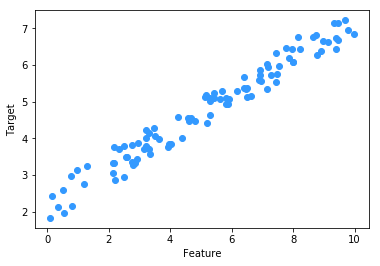

In [98]:
pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))

pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

We want to use the linear model 
$$ Y = \beta X + \gamma $$
If everything works out, we should expect $\beta \approx 0.5$ and $\gamma \approx 2.2$.

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
features = X.reshape((numSamples,1))   # features has shape (100,1), while X has shape (100,)

model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
x_test = np.linspace(0,10,100)
y_pred = model.predict( x_test.reshape((100,1)) )

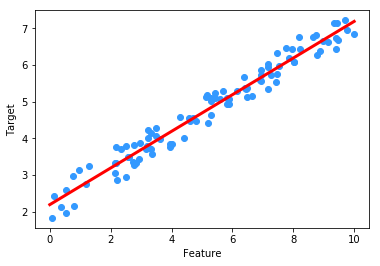

In [102]:
pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

In [103]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [ 0.49993787]
Intercept:    2.19344379257


In [104]:
print(model.score(features, Y))

0.96179551701


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features, Y, test_size=0.33)
model.fit(X_train, Y_train)
print("Cross-validated R2: ", model.score(X_test, Y_test) )

Cross-validated R2:  0.969520259946


Creating a 2D feature space with $X$ and $X^2$.

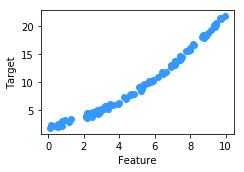

In [119]:
Y = linearCoef*X + 0.15*X**2 + Intercept + e
pl.figure(figsize=(3.5,2.5))

pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))

pl.xlabel('Feature')
pl.ylabel('Target')

pl.tight_layout()
pl.savefig('LinearModel_03.png',dpi=500, transparent=True)
pl.show()

In [120]:
features = np.zeros( (numSamples,2) )
features[:,0] = X
features[:,1] = X**2
print(features.shape)

(100, 2)


In [121]:
model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
x_test = np.linspace(0,10,100)
feat_test = np.zeros( (numSamples,2) )
feat_test[:,0] = x_test
feat_test[:,1] = x_test**2

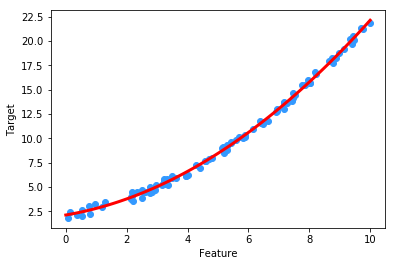

In [127]:
y_pred = model.predict( feat_test )

pl.plot(X, Y, 'o', color=(0.2,0.6,1.0))
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

## Second dataset

In [165]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(30, 20)


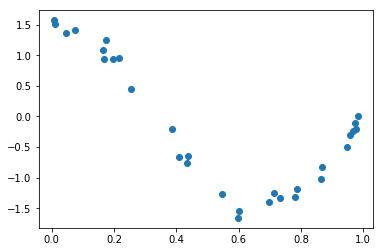

In [166]:
Y = data[:,0]    # all rows, first column
X = data[:,1:]   # all rows, all columns except the first

pl.plot(X[:,0], Y[:], 'o')
pl.show()

Lets store in the next array the average value of the coefficeints

In [268]:
coefs = []

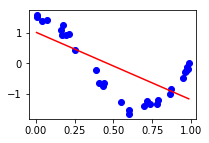

In [269]:
model = LinearRegression()
model.fit( X[:,:1] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:1]), 'r-')
pl.show()

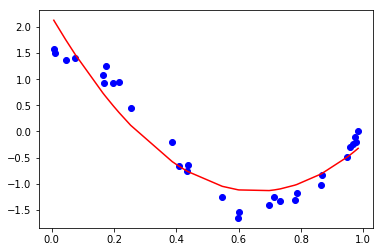

In [270]:
model = LinearRegression()
model.fit( X[:,:2] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:2]), 'r-')
pl.show()

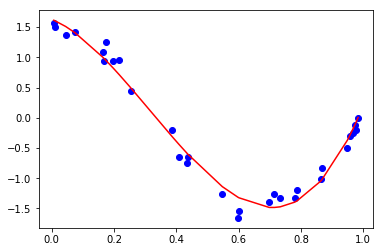

In [271]:
model = LinearRegression()
model.fit( X[:,:3] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:3]), 'r-')
pl.show()

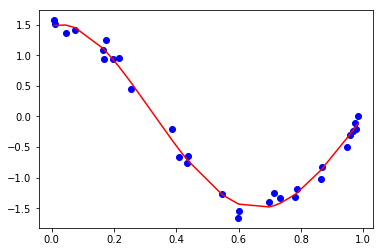

In [272]:
model = LinearRegression()
model.fit( X[:,:5] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:5]), 'r-')
pl.show()

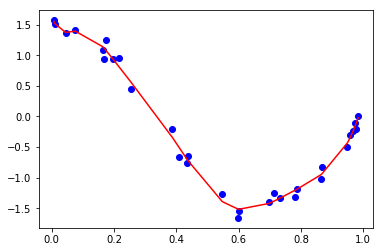

In [273]:
model = LinearRegression()
model.fit( X[:,:10] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:10]), 'r-')
pl.show()

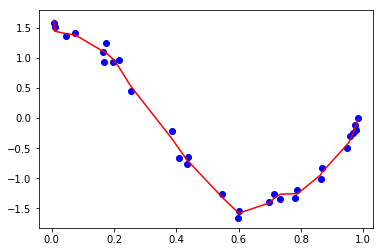

In [274]:
model = LinearRegression()
model.fit( X[:,:15] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:15]), 'r-')
pl.show()

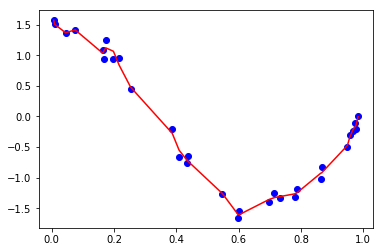

In [275]:
model = LinearRegression()
model.fit( X[:,:] , Y )
coefs.append( np.abs(model.coef_).mean() )

pl.plot(X[:,0], Y[:], 'bo')
pl.plot(X[:,0], model.predict(X[:,:]), 'r-')
pl.show()

Example of how to save a beautiful plot:

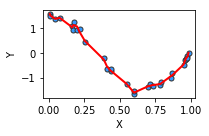

In [276]:
pl.figure(figsize=(3,2))

pl.plot(X[:,0], Y[:], 'o', markersize=5, markeredgecolor=(0.2,0.2,0.2), color=(0.2,0.6,1.0))

model = LinearRegression()
model.fit( X[:,:] , Y )
pl.plot(X[:,0], model.predict(X[:,:]), 'r-', lw=2)

pl.xlabel('X')
pl.ylabel('Y')

pl.tight_layout()
pl.savefig('LinearModel_07.png', dpi=500, transparent=True)
pl.show()

In [277]:
coefs

[2.2165337822219282,
 8.9416736660470537,
 9.4312776587048717,
 15.340241499881021,
 69852.54063157257,
 1043153581.8156064,
 1236146305856.8809]

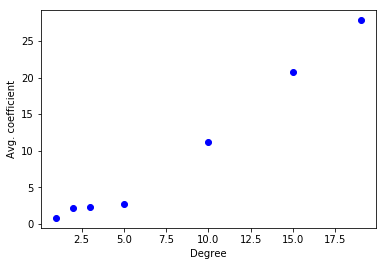

In [291]:
pl.plot([1,2,3,5,10,15,19], np.log(coefs),'bo', markersize=6)

pl.xlabel('Degree')
pl.ylabel('Avg. coefficient')

pl.show()

In [292]:
from sklearn.linear_model import Ridge

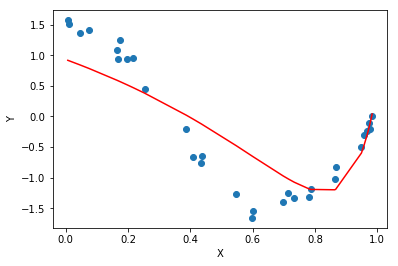

In [303]:
model = Ridge( alpha = 1.0 )
model.fit( X[:,:] , Y )

pl.plot(X[:,0], Y[:], 'o')
pl.plot(X[:,0], model.predict(X[:,:]), 'r-')

pl.xlabel('X')
pl.ylabel('Y')
pl.show()

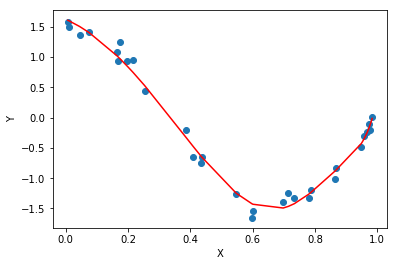

In [299]:
model = Ridge( alpha = 0.001 )
model.fit( X[:,:] , Y )

pl.plot(X[:,0], Y[:], 'o')
pl.plot(X[:,0], model.predict(X[:,:]), 'r-')

pl.xlabel('X')
pl.ylabel('Y')
pl.show()

# Principal Component Analysis

In [451]:
from sklearn.decomposition import PCA

In [457]:
X = np.random.random( (200, 3) )   # 50 samples with 3 features
X[:,2] = X[:,0]

Covariance matrix:
  [[ 0.0828261   0.00427449  0.0828261 ]
 [ 0.00427449  0.0738445   0.00427449]
 [ 0.0828261   0.00427449  0.0828261 ]]


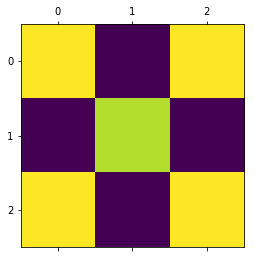

In [458]:
print("Covariance matrix:\n ", np.cov(X.T))  # \n breaks the line
pl.matshow(np.cov(X.T))
pl.show()

In [459]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [460]:
pca.explained_variance_ratio_

array([  6.93322796e-01,   3.06677204e-01,   5.49395466e-33])

In [461]:
pca.components_

array([[ -7.05591975e-01,  -6.54211705e-02,  -7.05591975e-01],
       [  4.62597533e-02,  -9.97857741e-01,   4.62597533e-02],
       [  7.07106781e-01,   2.83815879e-17,  -7.07106781e-01]])

[[  1.66048515e-01   8.29877763e-18   2.68648373e-17]
 [  8.29877763e-18   7.34481755e-02  -1.44349289e-18]
 [  2.68648373e-17  -1.44349289e-18   4.61730483e-33]]


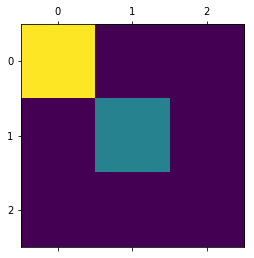

In [462]:
X_transform = pca.transform(X)
print(np.cov(X_transform.T))
pl.matshow(np.cov(X_transform.T))
pl.show()

## Interpreting "principal axis"

In [471]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise
Y = linearCoef*X + Intercept + e

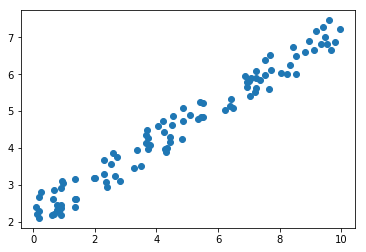

In [472]:
pl.plot(X,Y,'o')
pl.show()

In [473]:
data = np.array( [X, Y] ).T
np.cov(data.T)

array([[ 9.13949339,  4.61435285],
       [ 4.61435285,  2.41062227]])

In [474]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [475]:
pca.explained_variance_ratio_

array([ 0.9944248,  0.0055752])

In [476]:
pca.components_

array([[ 0.89138927,  0.45323853],
       [-0.45323853,  0.89138927]])

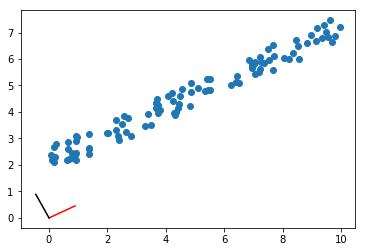

In [479]:
pl.plot(X,Y,'o')
pl.plot([0,pca.components_[0,0]],[0,pca.components_[0,1]],'r-')
pl.plot([0,pca.components_[1,0]],[0,pca.components_[1,1]],'k-')
pl.show()

In [480]:
X_transform = pca.transform( data )
np.cov(X_transform.T)

array([[  1.14857214e+01,   1.89298633e-15],
       [  1.89298633e-15,   6.43942180e-02]])